In [63]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv('heart.csv')
data.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0,2,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3,3,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2,1,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [64]:
data.tail()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,299,45,1,3,110,264,0,0,132,0,1.2,2,0,1,1
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2,1,1
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1,1,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,303,38,1,1,138,175,0,0,173,0,0.0,1,0,3,0


In [65]:
print(data.shape)


(303, 15)


In [66]:
#info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    int64  
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    int64  
 13  Thal        303 non-null    int64  
 14  AHD         303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [101]:
data.isnull().sum()#missingvalues


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [68]:
#statistical measure of the data
data.describe()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,0.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.676568,2.165017,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.942562,0.955550,0.499120
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,303.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,1.000000


In [74]:
#checking the distribution of the target variable
data['AHD'].value_counts()

#no --> has defective heart
#yes--> has healthy heart


0    164
1    139
Name: AHD, dtype: int64

In [70]:
 #splitting features from AHD
 x = data.drop(columns='AHD',axis=1)
 y = data['AHD']
 print(x)

     Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1          3     145   233    1        2    150   
1             2   67    1          0     160   286    0        2    108   
2             3   67    1          0     120   229    0        2    129   
3             4   37    1          1     130   250    0        0    187   
4             5   41    0          2     130   204    0        2    172   
..          ...  ...  ...        ...     ...   ...  ...      ...    ...   
298         299   45    1          3     110   264    0        0    132   
299         300   68    1          0     144   193    1        0    141   
300         301   57    1          0     130   131    0        0    115   
301         302   57    0          2     130   236    0        2    174   
302         303   38    1          1     138   175    0        0    173   

     ExAng  Oldpeak  Slope  Ca  Thal  
0        0      2.3      3   0     2  
1        1      1.5  

In [75]:
 print(y)

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64


In [76]:
#train and test data
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [77]:
print(x.shape,X_train.shape,X_test.shape)

(303, 14) (242, 14) (61, 14)


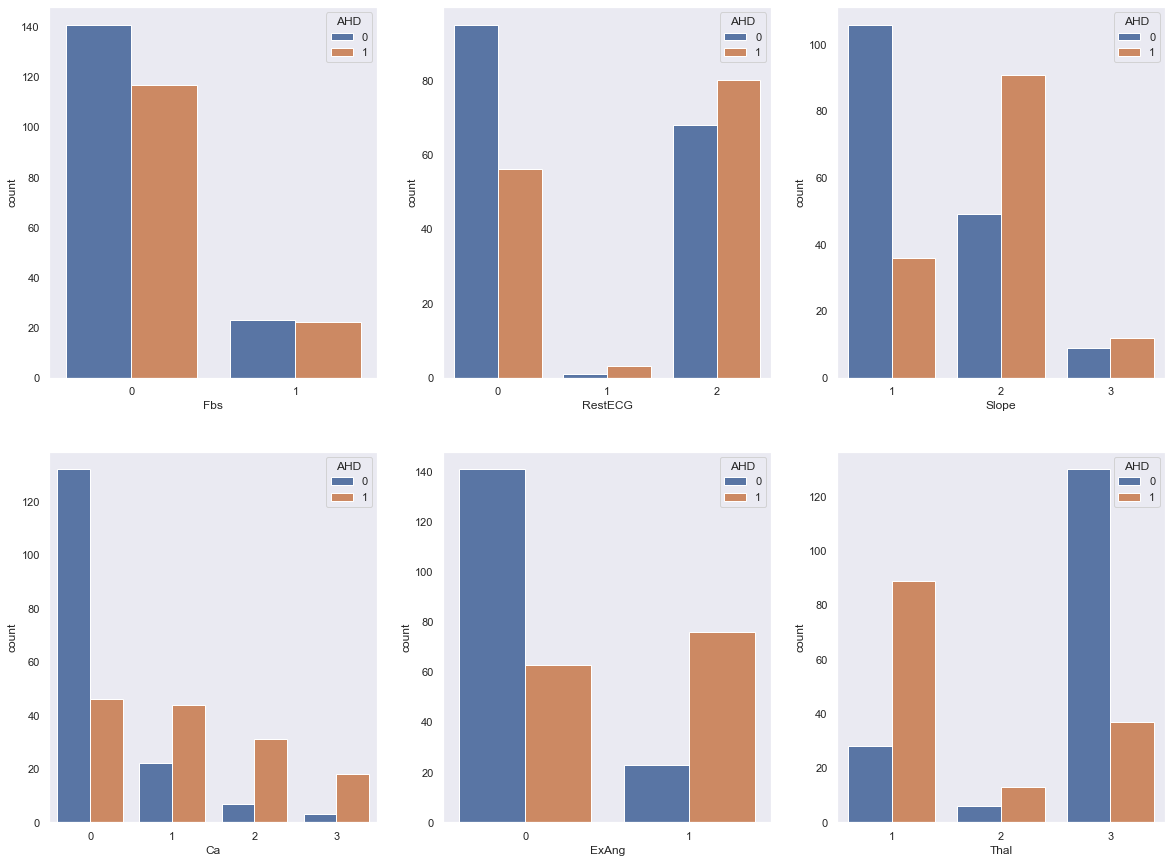

In [111]:
plt.figure(figsize=(20,15))
sns.set_theme(style='dark')
plt.subplot(2,3,1)
sns.countplot(data=data,x='Fbs',hue='AHD')
plt.subplot(2,3,2)
sns.countplot(data=data,x='RestECG',hue='AHD')
plt.subplot(2,3,3)
sns.countplot(data=data,x='Slope',hue='AHD')
plt.subplot(2,3,4)
sns.countplot(data=data,x='Ca',hue='AHD')
plt.subplot(2,3,5)
sns.countplot(data=data,x='ExAng',hue='AHD')
plt.subplot(2,3,6)
sns.countplot(data=data,x='Thal',hue='AHD')
plt.show()


In [109]:
#Logistic Regression 
Hmodel=LogisticRegression()

In [79]:
#training the LRwith training data
Hmodel.fit(X_train, Y_train)

LogisticRegression()

In [82]:
#evaluvation
#accuracy score
X_train_prediction = Hmodel.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [83]:
print('Accuracy on Training data :',training_data_accuracy)

Accuracy on Training data : 0.8801652892561983


In [84]:
X_test_prediction = Hmodel.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [85]:
print('Accuracy on Test data :',test_data_accuracy)

Accuracy on Test data : 0.8360655737704918


In [97]:
#buliding a predictive system
input_Hdata =(55,60,1,0,130,253,0,0,144,1,1.4,1,1,1)

#change data to numpy array
input_data_as_numpy_arr= np.asarray(input_Hdata)

#reshape the numpy array as we are predicting only for one 
input_data_reshape = input_data_as_numpy_arr.reshape(1,-1)

prediction = Hmodel.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print("The person is not diagnosed with Heart Disease")
else:
    print("The person is diagonsed with Heart Disease")

[1]
The person is diagonsed with Heart Disease
